Load necessary modules

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

Generate artificial data

In [2]:
#fix random number generator
np.random.seed(111)

mu = 0.0
sigma = 1.15
N= 51

X = np.linspace(-4,4,N)
X = X.reshape(-1,1)
	
y = np.zeros(N)
y = y.reshape(-1,1)

epsilon = np.random.normal(mu,sigma,N)
epsilon = epsilon.reshape(-1,1)

y = X*X + epsilon

Carry out validation set approach and plot generalization error for various random splits

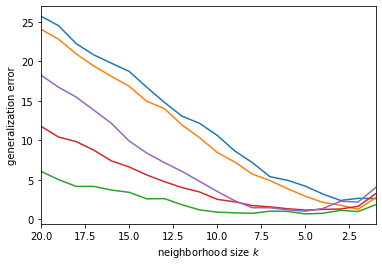

In [3]:
N_train = 40
kMax = 20

#plt.rcParams.update({'font.size': 16})
plt.figure()
plt.xlim(kMax,1)

for s in range(5):

	indices = list(range(N));
	indices_perm = np.random.permutation(indices)

	X_train = X[indices_perm[:N_train]]
	y_train = y[indices_perm[:N_train]]
	X_validate = X[indices_perm[N_train:]]
	y_validate = y[indices_perm[N_train:]]
	
	errors = np.zeros(kMax)

	for k in range(1,kMax+1):
		neigh = KNeighborsRegressor(n_neighbors=k)
		neigh.fit(X_train, y_train)
		y_prediction = neigh.predict(X_validate)
		errors[k-1] = np.sum((y_prediction-y_validate)**2)/len(y_prediction)

	plt.plot(np.linspace(1,kMax,kMax),errors)

plt.xlabel("neighborhood size $k$")
plt.ylabel("generalization error")
plt.show()